In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# archivos con funciones de visualización
#import lec3_graphs as gfx


plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos

In [2]:
import data_apoyo.lec3_graphs as gfx

In [3]:
df = pd.read_csv('data_apoyo/qog_std_cs_jan18.csv')

In [4]:
# vamos a eliminar los datos perdidos en la columna undp_hdi (indice de desarrollo humano)
hdi_dropna = df['undp_hdi'].dropna();

### Distribución normal sobre histograma

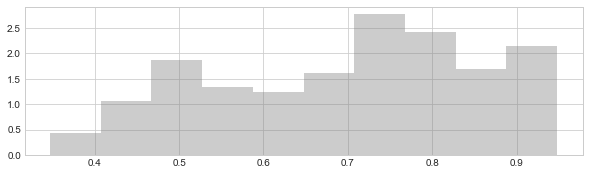

In [5]:
# dividimos el espacio en dos partes
plt.subplot(2, 1, 1)

# graficamos mismo histograma, especificando density para que el histograma represente densidades y no frecuencias
plt.hist(hdi_dropna, color='grey', alpha=.4, density=True)

# extraemos los limites del histograma
x_min, x_max = plt.xlim()

# utilizandos los límites del histograma para crear un array
x_axis = np.linspace(x_min, x_max, 100)

Text(0.5, 1.0, 'Histograma del IDH')

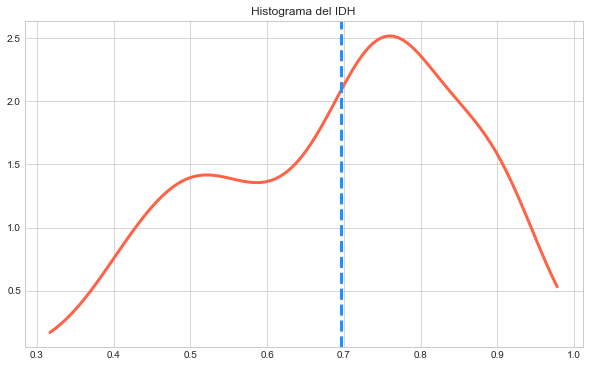

In [6]:
# graficamos la curva de densidad empirica (permite comparar directamente con la curva de densidad teorica)
gauss_kde = stats.gaussian_kde(hdi_dropna) # kernel gaussiano
Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)
plt.plot(x_axis, Z, color='tomato', lw=3)

# agregamos la línea vertical para identificar la media
plt.axvline(hdi_dropna.mean(), color='dodgerblue', linestyle='--', lw=3)
plt.title("Histograma del IDH")

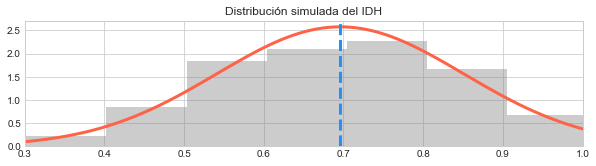

In [7]:
# El segundo gráfico
plt.subplot(2, 1, 2)

# Simulamos cómo debería comportarse un histograma normal.
plt.hist(np.random.normal(0.696, np.sqrt(0.024), 1000), color='grey', alpha=.4, density=True)

# Fijamos los límites del eje x
plt.xlim(0.3, 1)

# Generamos una lista entre
x_axis = np.linspace(.3, 1, 1000)
plt.plot(x_axis, stats.norm.pdf(x_axis, 0.696, np.sqrt(0.024)), color='tomato', lw=3)

plt.axvline(0.696, color='dodgerblue', linestyle='--', lw=3)
plt.title("Distribución simulada del IDH")
plt.subplots_adjust(hspace=0.6)

## PIB

In [8]:
# Generamos la normalización del gdp mediante el logaritmo.
gdp_dropna = df['gle_cgdpc'].dropna()
log_gdp = np.log(gdp_dropna)

Text(0.5, 1.0, 'Histograma PIB')

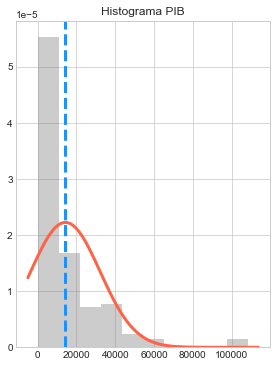

In [9]:
# histograma

plt.subplot(1, 2, 1)
plt.hist(gdp_dropna, color='grey', alpha=.4, density=True)
x_min, x_max = plt.xlim()
x_axis = np.linspace(x_min, x_max, 100)
plt.plot(x_axis, stats.norm.pdf(x_axis,
gdp_dropna.mean(),
gdp_dropna.std()),
color='tomato', lw=3)
plt.axvline(gdp_dropna.mean(), color='dodgerblue', linestyle='--', lw=3)
plt.title("Histograma PIB")

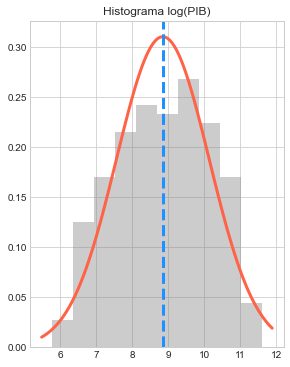

In [10]:
plt.subplot(1, 2, 2)
plt.hist(log_gdp, color='grey', alpha=.4, density=True)
x_min, x_max = plt.xlim()
x_axis = np.linspace(x_min, x_max, 100)
plt.plot(x_axis, stats.norm.pdf(x_axis, log_gdp.mean(), log_gdp.std()), color='tomato', lw=3)

plt.axvline(log_gdp.mean(), color='dodgerblue', linestyle='--', lw=3)
plt.title("Histograma log(PIB)");